# Homework 11

**1. Build a classification tree on the Titanic data using `Survived` as the outcome and `Sex, Pclass, Age, PassengerId` as explanatory variables**
- Explore various values (1-4) of `max_depth` and describe when you feel that overfitting sets in
- For `max_depth`=2: would you split the leaf which contains women of Pclass 1 and 2 further ? Compute the impurity gain!
    
**import libraries**

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

**load the titanic dataframe**

In [160]:
df = pd.read_csv(r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\data\TitanicTrain.csv")
df["Sex_Int"] = df.Sex.map(dict(female =  1, male = 0))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


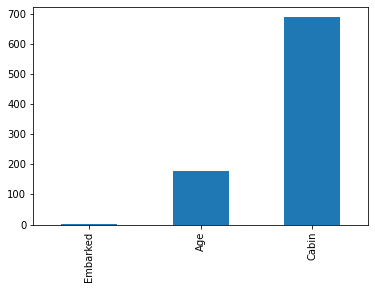

In [161]:
df[df.columns[df.isna().sum() > 0]].isna().sum().sort_values().plot.bar();

In [162]:
df.Age.fillna(df.Age.median(), inplace = True)

In [163]:
#split to test and train
X_train, X_test, y_train, y_test = train_test_split(df[["Sex_Int","Pclass","Age","PassengerId"]], df.Survived, test_size = 0.3, random_state = 1)

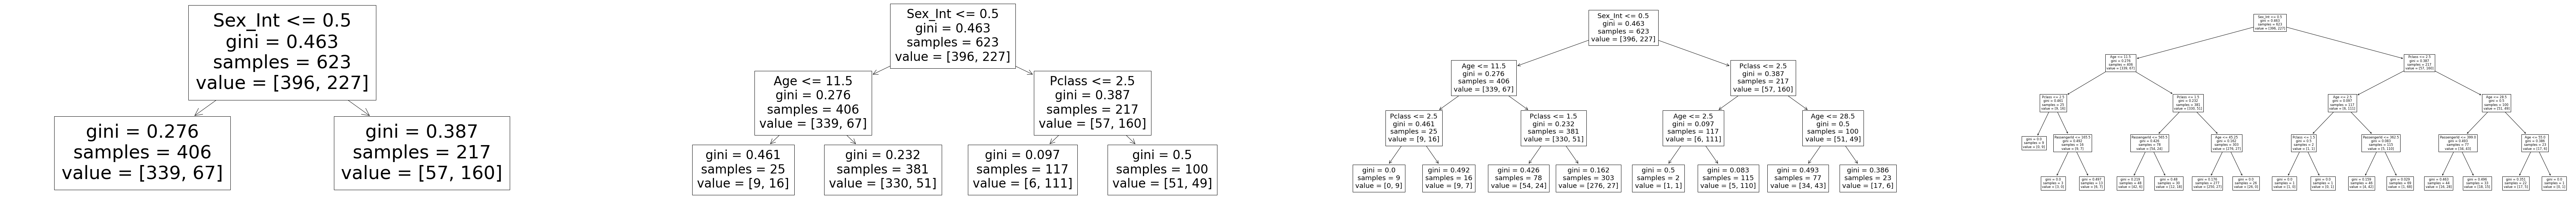

In [164]:
#Initialize subplot for comparison
fig, ax = plt.subplots(4,1, figsize=(125,10))
#fit and plot with depth = 1
clf1 = DecisionTreeClassifier(max_depth=1)
clf1.fit(X_train, y_train)
ax1 = plt.subplot(1,4,1)
ax1 = plot_tree(clf1, feature_names = ["Sex_Int","Pclass","Age","PassengerId"]);

#fit and plot with depth = 2
clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(X_train, y_train)
ax2 = plt.subplot(1,4,2)
ax2 = plot_tree(clf2, feature_names = ["Sex_Int","Pclass","Age","PassengerId"]);

#fit and plot with depth = 3
clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(X_train, y_train)
ax3 = plt.subplot(1,4,3)
ax3 = plot_tree(clf3, feature_names = ["Sex_Int","Pclass","Age","PassengerId"]);

#fit and plot with depth = 4
clf4 = DecisionTreeClassifier(max_depth=4)
clf4.fit(X_train, y_train)
ax4 = plt.subplot(1,4,4)
ax4 = plot_tree(clf4, feature_names = ["Sex_Int","Pclass","Age","PassengerId"]);

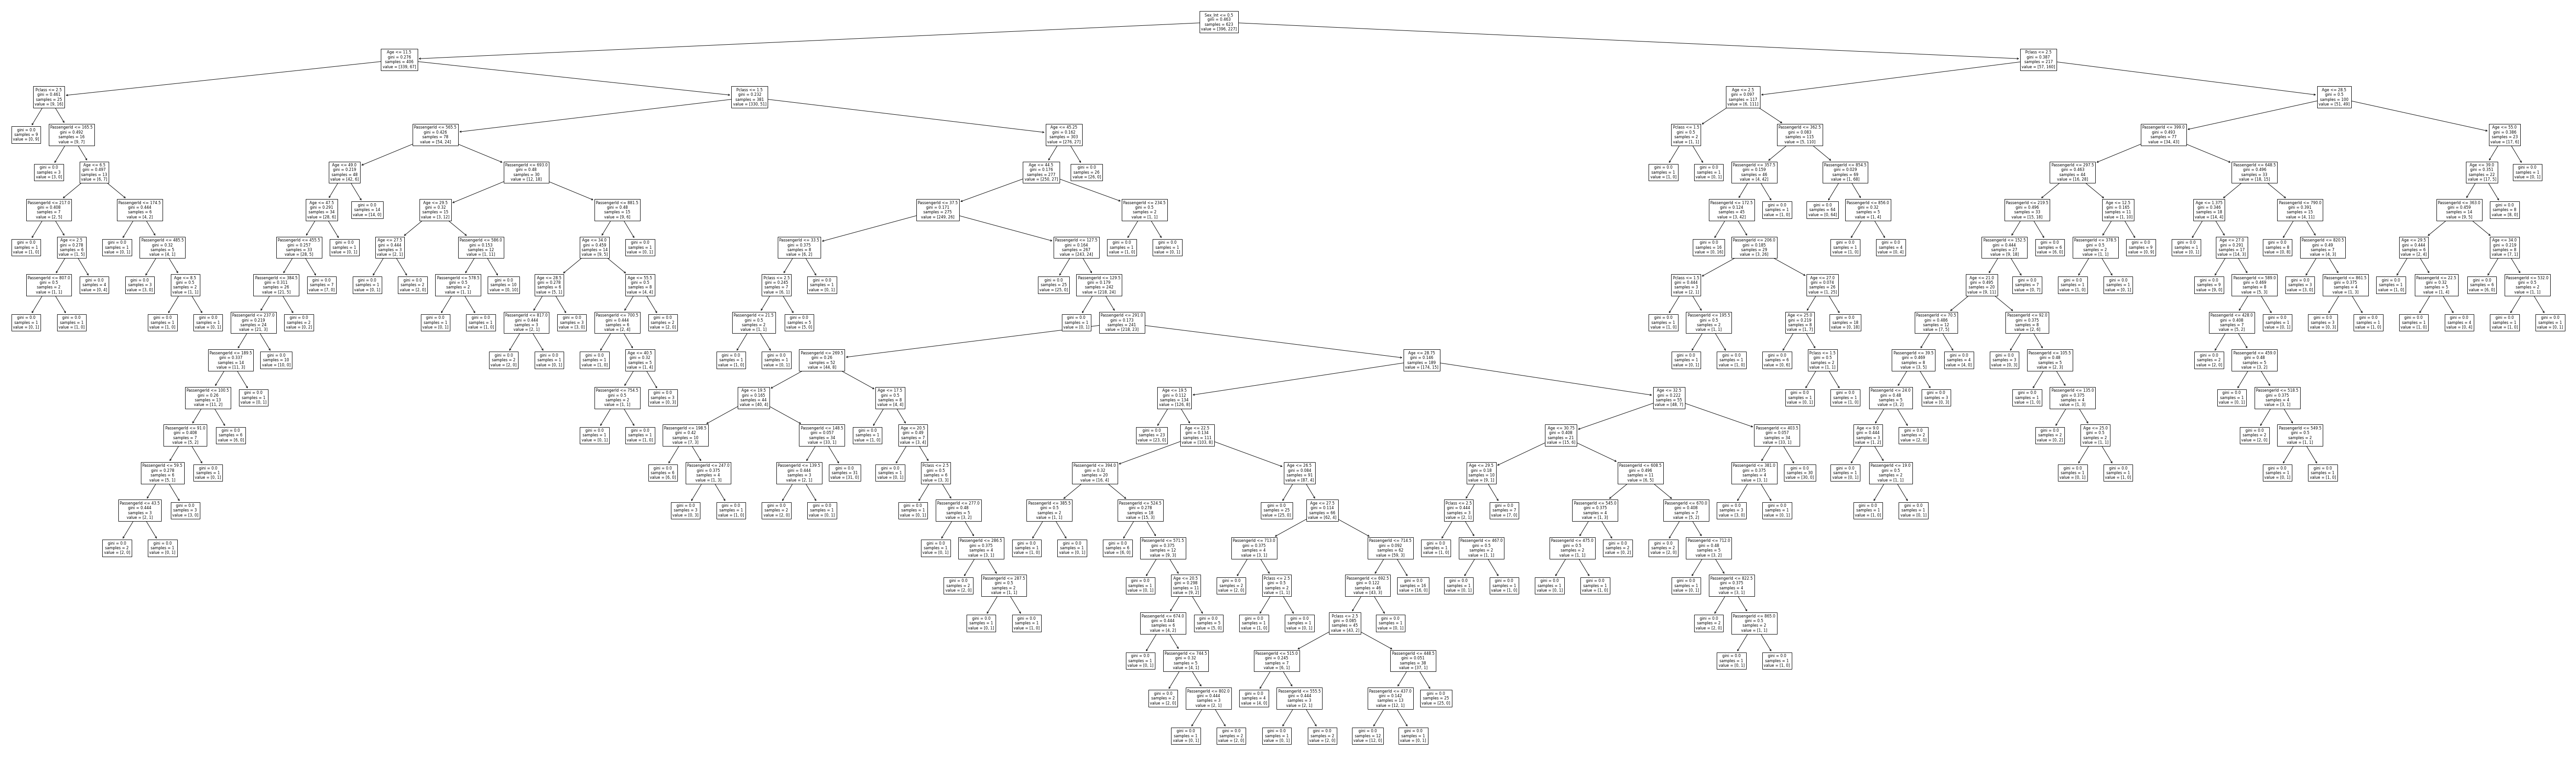

In [165]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plt.figure(figsize=(100,30))
plot_tree(clf, feature_names = ["Sex_Int","Pclass","Age","PassengerId"]);

In [166]:
#score the decision tree train accuracy
train_scores = []
train_scores.append(clf1.score(X_train, y_train))
train_scores.append(clf2.score(X_train, y_train))
train_scores.append(clf3.score(X_train, y_train))
train_scores.append(clf4.score(X_train, y_train))
train_scores.append(clf.score(X_train, y_train))
#score the decision tree test accucary
test_scores = []
test_scores.append(clf1.score(X_test, y_test))
test_scores.append(clf2.score(X_test, y_test))
test_scores.append(clf3.score(X_test, y_test))
test_scores.append(clf4.score(X_test, y_test))
test_scores.append(clf.score(X_test, y_test))

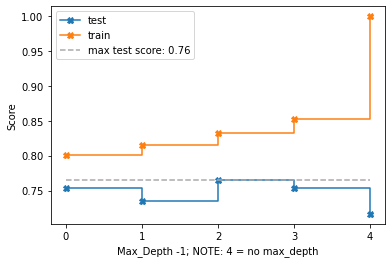

In [167]:
#plot test-train accuracy tradeoff
plt.plot(test_scores, marker = "X", drawstyle = "steps-post"); #i think steps-post looks great for this kind of data where there is a lack in data points
plt.plot(train_scores, marker = "X", drawstyle = "steps-post");
#find max value
testmax = [max(test_scores)]*5
plt.plot(testmax, color = "darkgray", linestyle = "dashed");
#beautify
plt.xlabel("Max_Depth -1; NOTE: 4 = no max_depth");
plt.ylabel("Score");
plt.xticks([0,1,2,3,4])
plt.legend(["test","train","max test score: %0.2f" % max(test_scores)]);


In [168]:
test_scores

[0.753731343283582,
 0.7350746268656716,
 0.7649253731343284,
 0.753731343283582,
 0.7164179104477612]

- Starting with $max  depth = 3$ we can see that the leaves start containing sample sizes of $n < 10$, which are even seperated into leaves of $n = 1$ in three cases with $max  depth = 4$
    - leaves with a samplesize of $n = 1$ should logically always reach $gini = 0.0$ 


    
- for fun, the classifier with none max depth specified was calculated - which kept splitting the tree until every leaf had a perfect gini coefficient.


- interestingly, as shown in the score plot, we see that the accuracy on the test set does not differ a lot, however, we find the best accuracy at $maxdepth = 3$ (dashed line)!


- Very interesting too is, that the score for $maxdepth = 2$ is only slightly better than for $maxdepth = none$, at the same time $maxdepth = 1$ and $maxdepth = 4$ also score the same.


Concluding, I think it is hard to say, that $maxdepth = 4$ is already being overfitted. We should probably also look at higher max_depth up to 18 (which is found when not specified), to get further insights on the actual variation of decision trees

# Task 2

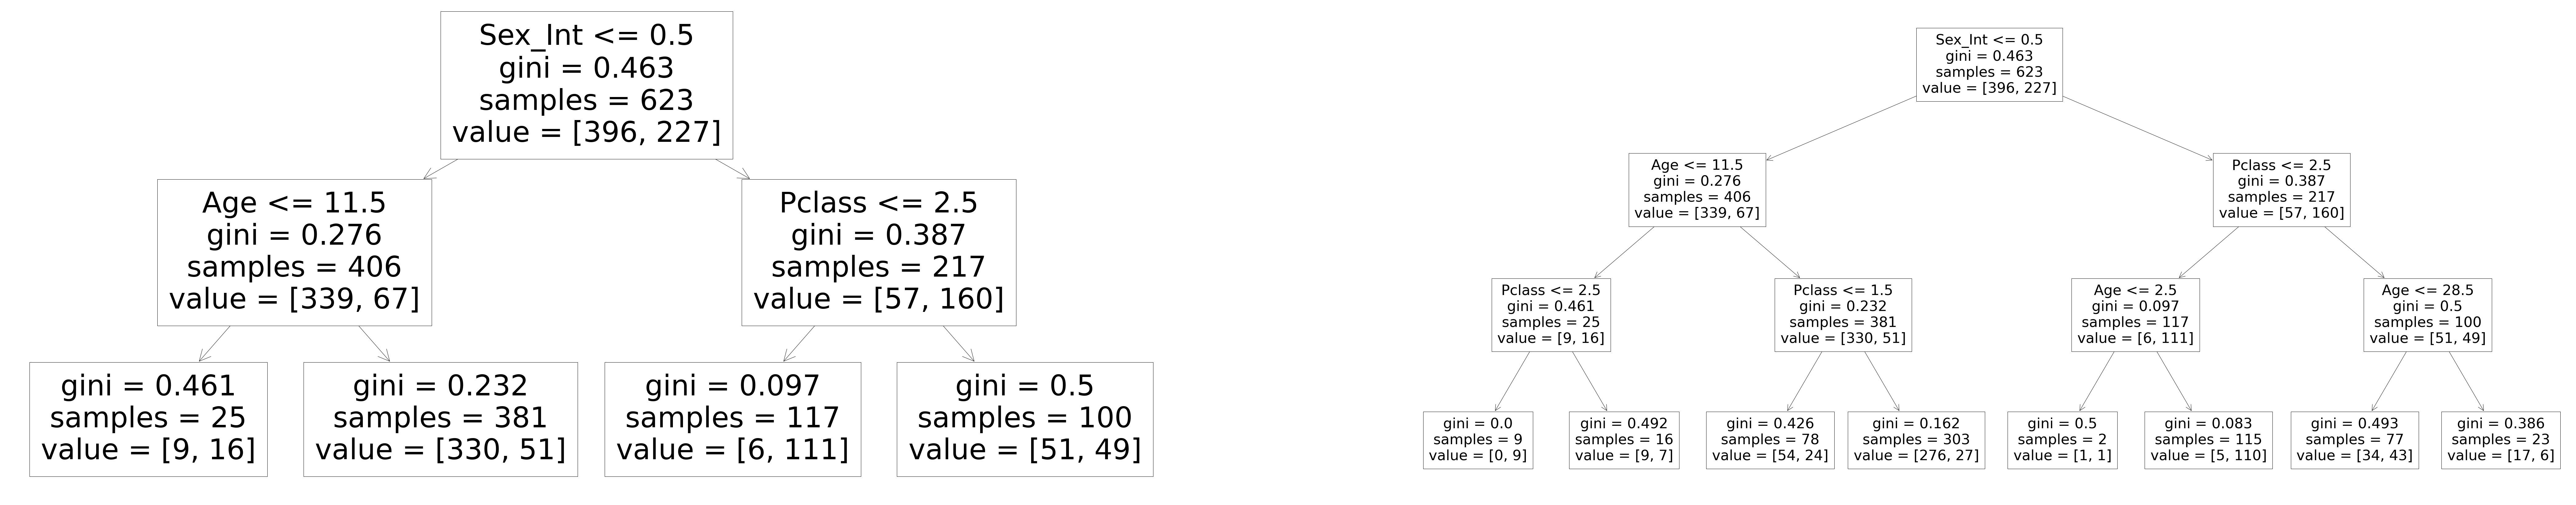

In [169]:
fig, ax = plt.subplots(2,1, figsize=(150,30))
ax2 = plt.subplot(1,2,1)
ax2 = plot_tree(clf2, feature_names = ["Sex_Int","Pclass","Age","PassengerId"]);
ax3 = plt.subplot(1,2,2)
ax3 = plot_tree(clf3, feature_names = ["Sex_Int","Pclass","Age","PassengerId"]);

In [170]:
#on max depth = 2 (left plot): women = first right-split, pclass 1-2 = second left-split have a gini-score of 0.097
#on max depth = 3 (right plot), this step is seperated again -> we can easily read the gini coefficients 

impurity_gain = 0.097 - (0.5 * 2/117 + 0.083 * 115/117)
print(f"the impurity gain for splitting the women in pclass 1 and 2 again (by age <= 2.5) is at {impurity_gain}") 

the impurity gain for splitting the women in pclass 1 and 2 again (by age <= 2.5) is at 0.006871794871794873


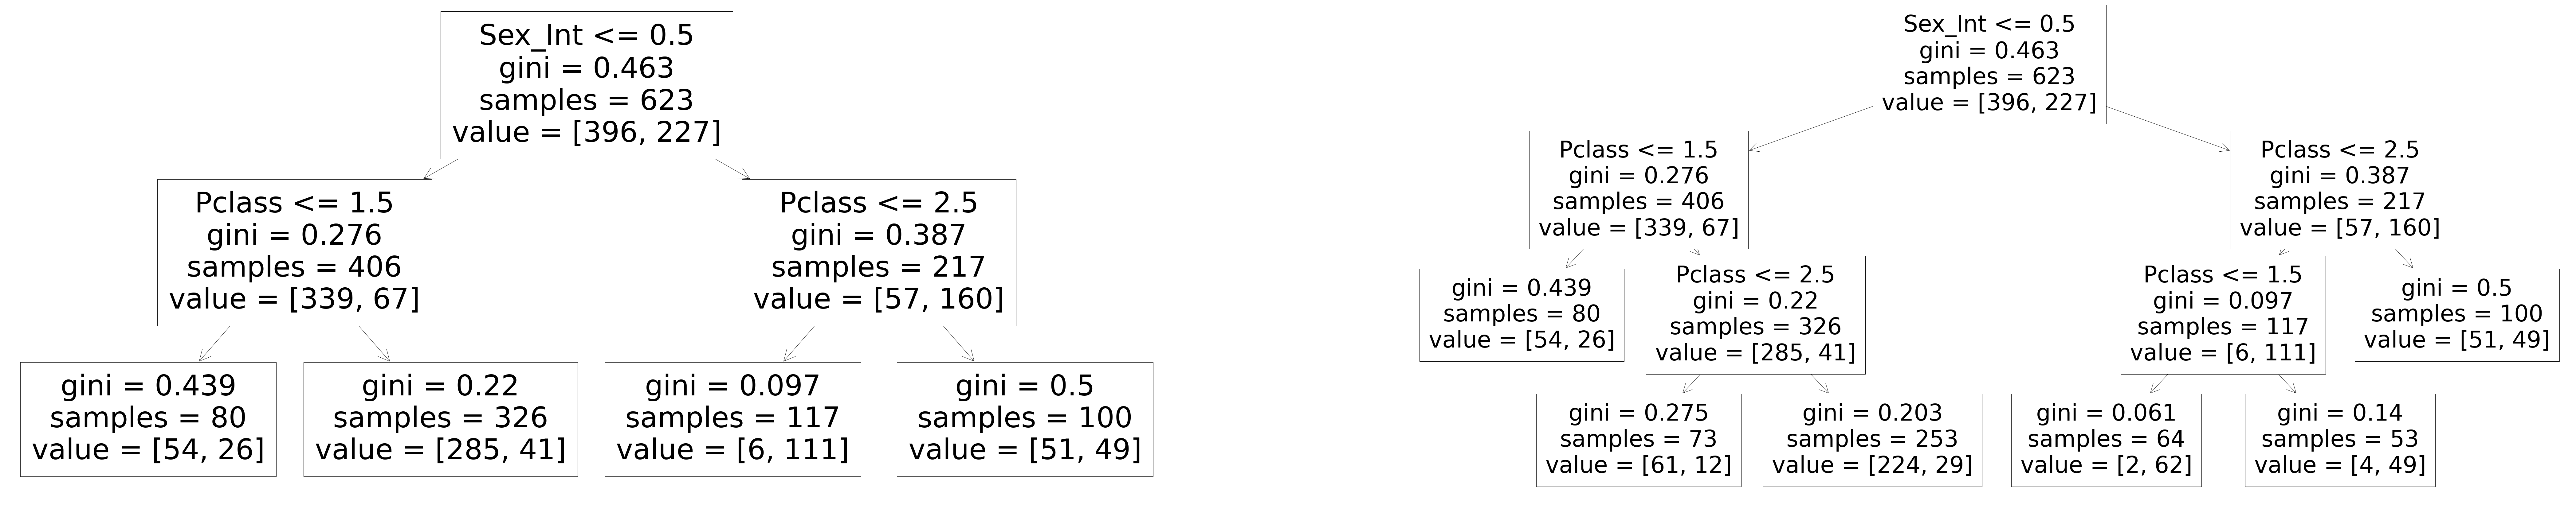

In [171]:
#what if we want to split into pclass 1 and 2?
X_train = X_train.drop(columns = ["Age","PassengerId"]) #drop the columns in order to get the same splits but forcing the third split to be on pclass
clf5 = DecisionTreeClassifier(max_depth = 2)
clf5.fit(X_train, y_train)
clf6 = DecisionTreeClassifier(max_depth = 3)
clf6.fit(X_train, y_train)

fig, ax = plt.subplots(2,1, figsize=(150,30))
ax2 = plt.subplot(1,2,1)
ax2 = plot_tree(clf5, feature_names = ["Sex_Int","Pclass"]);
ax3 = plt.subplot(1,2,2)
ax3 = plot_tree(clf6, feature_names = ["Sex_Int","Pclass"]);

In [4]:
#on max depth = 2 (left plot): women = first right-split, pclass 1-2 = second left-split have a gini-score of 0.097
#on max depth = 3 (right plot), this step is seperated again -> we can easily read the gini coefficients 

impurity_gain = 0.097 - (0.061 * 64/117 + 0.15 * 53/117)
print(f"the impurity gain for splitting the women in pclass 1 and 2 again (by age <= 2.5) is at {impurity_gain}") 

the impurity gain for splitting the women in pclass 1 and 2 again (by age <= 2.5) is at -0.004316239316239312


Here we can see, that not only splitting on age over pclass again improves the impurity score the most BUT ALSO splitting on pclass again actually REDUCES the impurity score!